In [28]:
import numpy as np 
from process_operator import * 
from measure_model import * 
from figure import * 
from exact import H_exact
import matplotlib.pyplot as plt
from numerical_krylov import numerical_quantum_krylov_diag

Text(0.5, 0, 'Occupation number')

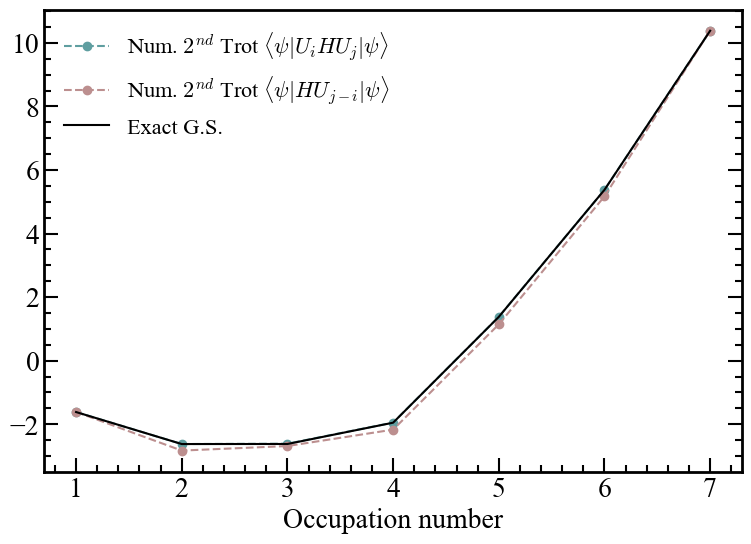

In [29]:
####### energy of hubbard model with different occupation number ####### 
initial_states = ['00100000', '00101000', '01001010', '01010101', '10101011', '11101011', '11111011']
n, t, U, dt, krylov_d = 8, 1, 4, 0.25, 10
exact_gs_energy, num_krylov_gs_energy, num_krylov_toe_gs_energy = [], [], []
for i in range(7):
    if i == 0 or i == 6: 
        krylov_d =4
    else: 
        krylov_d = 10
    exact_ground_state = H_exact(n, t, U, i+1, True)
    num_krylov, num_H, num_S = numerical_quantum_krylov_diag(n, initial_states[i], t, U, i+1, dt, krylov_d, False)
    num_krylov_toeplitz, num_H_toe, num_S_toe = numerical_quantum_krylov_diag(n, initial_states[i], t, U, i+1, dt, krylov_d, True)
    exact_gs_energy.append(exact_ground_state[0])
    num_krylov_gs_energy.append(num_krylov[-1])
    num_krylov_toe_gs_energy.append(num_krylov_toeplitz[-1])

fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams['mathtext.fontset'] ='cm'
ax.plot(np.arange(7)+1, num_krylov_gs_energy, color = 'cadetblue',linestyle='--', marker='o',
         label='Num. $2^{nd}$ Trot $\langle \psi|U_i H U_j|\psi \\rangle $')
ax.plot(np.arange(7)+1, num_krylov_toe_gs_energy, color = 'rosybrown',linestyle='--', marker='o',
        label= 'Num. $2^{nd}$ Trot $\langle \psi| H U_{j-i}|\psi \\rangle $' )
ax.plot(np.arange(7)+1, exact_gs_energy, color ='black', label='Exact G.S.')
adjust_ax(ax)
ax.legend(prop=font3, ncol=1, frameon=False)
ax.set_xlabel('Occupation number', font=font2)
